# HDF5 file loading and data preprocessing

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import vprd
import matplotlib.pyplot as plt

## Load the hdf5 files

In [2]:
data_path = Path('../../data')
local_data_path = data_path / 'cloud/'

# we keep dataset1 for testing purposes
datasets = []
# datasets.append(local_data_path / 'PBD2_VRFD_pbd2_stream_6_run52040_file113_20240227T1529.hdf5')
# group ``/`` does not have a child named ``/FLASH.DIAG/CAMERA/OTR9FL2XTDS/TrainId``

# 
# long training dataset
datasets.append(local_data_path / 'PBD2_VRFD_pbd2_stream_6_run52040_file114_20240227T153103.hdf5')
datasets.append(local_data_path / 'PBD2_VRFD_pbd2_stream_6_run52040_file115_20240227T153214.hdf5')
datasets.append(local_data_path / 'PBD2_VRFD_pbd2_stream_6_run52040_file116_20240227T153325.hdf5') 
datasets.append(local_data_path / 'PBD2_VRFD_pbd2_stream_6_run52040_file117_20240227T153436.hdf5')
output_file_name = 'electron_power_data_files_114_115_116_117.hdf5'

# # lasing_off dataset with matching lasing_on
# datasets.append(local_data_path / 'PBD2_VRFD_pbd2_stream_6_run52040_file130_20240227T155051.hdf5')
# output_file_name = 'electron_power_data_files_130.hdf5'

# # lasing_on dataset with matching lasing_off
# datasets.append(local_data_path / 'PBD2_VRFD_pbd2_stream_6_run52040_file132_20240227T155455O.hdf5')
# output_file_name = 'electron_power_data_files_132.hdf5'

In [3]:
data = [vprd.hdf5_to_df(data_path) for data_path in datasets]
df = pd.concat(data)
df = df.reset_index()
df

,index,TrainId,Images,/FLASH_SDIAG/BCM_DAQ/FL0_DBC1_1/COMPRESSION_TD,/FLASH_SDIAG/BCM_DAQ/FL0_DBC1_1/COMPRESSION_normalized_TD,/FLASH_SDIAG/BCM_DAQ/FL0_DBC1_2/COMPRESSION_TD,/FLASH_SDIAG/BCM_DAQ/FL0_DBC1_2/COMPRESSION_normalized_TD,/FLASH_SDIAG/BCM_DAQ/FL0_DBC2_1/COMPRESSION_TD,/FLASH_SDIAG/BCM_DAQ/FL0_DBC2_1/COMPRESSION_normalized_TD,/FLASH_SDIAG/BCM_DAQ/FL0_DBC2_2/COMPRESSION_TD,...,/FLASH_SDIAG/BAM_DAQ/FL0_DBC2_ARRIVAL_TIME_RELATIVE/Value,/FLASH_SDIAG/BAM_DAQ/FL0_UBC1_ARRIVAL_TIME_RELATIVE/Value,/FLASH_SDIAG/BAM_DAQ/FL0_UBC2_ARRIVAL_TIME_RELATIVE/Value,/FLASH_SDIAG/BAM_DAQ/FL2_SEED5_ARRIVAL_TIME_RELATIVE/Value,/FLASH_DIAG/TOROID/7FL2XTDS/CHARGE_TD,/FLASH_DIAG/BPM/9FL2XTDS/CHARGE_TD,/FLASH_DIAG/BPM/9FL2XTDS/X_TD,/FLASH_DIAG/BPM/9FL2XTDS/Y_TD,/FLASH_SDIAG/BAM_DAQ/FL0_DBC_ARRIVAL_TIME_1_DELTA/Value,/FLASH_SDIAG/BAM_DAQ/FL0_DBC_ARRIVAL_TIME_2_DELTA/Value
0,0,1942830449,"[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,...",0.013977,0.348380,0.091400,2.278164,0.074997,1.845281,0.121796,...,-220.290619,104.842995,61.064560,0.000000,0.19975,0.312712,3.350192,0.666741,-158.124146,-281.355164
1,1,1942830450,"[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,...",0.013916,0.346859,0.091583,2.282728,0.070892,1.739970,0.117287,...,-261.015320,155.832520,64.939682,0.000000,0.20020,0.313796,3.352160,0.641766,-212.231873,-325.955017
2,2,1942830451,"[[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.014160,0.356138,0.090637,2.279587,0.069534,1.720248,0.113998,...,-264.227295,118.235802,38.283401,0.000000,0.19915,0.311799,3.350848,0.631928,-182.867188,-302.510681
3,3,1942830452,"[[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,...",0.014252,0.356649,0.091309,2.284999,0.070473,1.739136,0.116226,...,-279.466400,121.219620,47.366535,0.000000,0.19920,0.312148,3.348224,0.605440,-180.267105,-326.832947
4,4,1942830453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.013397,0.338816,0.090607,2.291443,0.070549,1.769915,0.117233,...,-257.225800,125.389000,54.010460,0.000000,0.19805,0.309478,3.344944,0.613008,-149.830109,-311.236267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,701,1942833280,"[[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,...",0.013794,0.346406,0.091064,2.286891,0.069237,1.726600,0.116127,...,3199.421387,95.763153,50.104500,915.777893,0.19845,0.307937,3.297712,1.471219,-24.689453,3149.316895
2822,702,1942833281,"[[1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,...",0.013336,0.336933,0.090881,2.296079,0.070290,1.757240,0.117294,...,3176.591797,70.574585,34.945549,913.403259,0.19795,0.307196,3.302304,1.437920,-18.579449,3141.646240
2823,703,1942833282,"[[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,...",0.012634,0.320326,0.090424,2.292573,0.074982,1.880179,0.119492,...,3217.532715,22.281994,84.973656,908.230225,0.19790,0.306707,3.303616,1.434893,85.547791,3132.559082
2824,704,1942833283,"[[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,...",0.012787,0.320312,0.091187,2.284229,0.071724,1.766502,0.118690,...,3214.079834,112.387871,112.746269,911.354187,0.19890,0.308870,3.304928,1.428082,13.353401,3101.333496


In [4]:
df.keys()

Index(['index', 'TrainId', 'Images',
       '/FLASH_SDIAG/BCM_DAQ/FL0_DBC1_1/COMPRESSION_TD',
       '/FLASH_SDIAG/BCM_DAQ/FL0_DBC1_1/COMPRESSION_normalized_TD',
       '/FLASH_SDIAG/BCM_DAQ/FL0_DBC1_2/COMPRESSION_TD',
       '/FLASH_SDIAG/BCM_DAQ/FL0_DBC1_2/COMPRESSION_normalized_TD',
       '/FLASH_SDIAG/BCM_DAQ/FL0_DBC2_1/COMPRESSION_TD',
       '/FLASH_SDIAG/BCM_DAQ/FL0_DBC2_1/COMPRESSION_normalized_TD',
       '/FLASH_SDIAG/BCM_DAQ/FL0_DBC2_2/COMPRESSION_TD',
       '/FLASH_SDIAG/BCM_DAQ/FL0_DBC2_2/COMPRESSION_normalized_TD',
       '/FLASH_SDIAG/BCM_DAQ/FL2_SEED5_1/COMPRESSION_TD',
       '/FLASH_SDIAG/BCM_DAQ/FL2_SEED5_1/COMPRESSION_normalized_TD',
       '/FLASH_SDIAG/BCM_DAQ/FL2_SEED5_2/COMPRESSION_TD',
       '/FLASH_SDIAG/BCM_DAQ/FL2_SEED5_2/COMPRESSION_normalized_TD',
       '/FLASH_SDIAG/BAM_DAQ/FL0_DBC1_ARRIVAL_TIME_RELATIVE/Value',
       '/FLASH_SDIAG/BAM_DAQ/FL0_DBC2_ARRIVAL_TIME_RELATIVE/Value',
       '/FLASH_SDIAG/BAM_DAQ/FL0_UBC1_ARRIVAL_TIME_RELATIVE/Value',
     

### Format the machine parameters as a latex table

In [5]:
print(r'''\begin{table}
\centering
\caption{The 23 machine parameters used as model input. \textcolor{red}{@Naji, could you please fill out this table? Particularly, give the parameters speaking names and replace <Unit> with the proper unit.}}
\begin{tabular}{@{}p{0.6\linewidth}p{0.4\linewidth}@{}}
\toprule
Parameter name & usual value range \\ \midrule''')
for key in df.keys():
    if key.startswith('/'):
        print(f"{key.replace('_', ' ')} & {df[key].min():.3f} - {df[key].max():.3f}  <Unit> \\\\")
print(r'''\bottomrule
\end{tabular}
\label{tab:machine_parameters}
\end{table}''')

\begin{table}
\centering
\caption{The 23 machine parameters used as model input. \textcolor{red}{@Naji, could you please fill out this table? Particularly, give the parameters speaking names and replace <Unit> with the proper unit.}}
\begin{tabular}{@{}p{0.6\linewidth}p{0.4\linewidth}@{}}
\toprule
Parameter name & usual value range \\ \midrule
/FLASH SDIAG/BCM DAQ/FL0 DBC1 1/COMPRESSION TD & 0.011 - 0.015  <Unit> \\
/FLASH SDIAG/BCM DAQ/FL0 DBC1 1/COMPRESSION normalized TD & 0.285 - 0.379  <Unit> \\
/FLASH SDIAG/BCM DAQ/FL0 DBC1 2/COMPRESSION TD & 0.089 - 0.093  <Unit> \\
/FLASH SDIAG/BCM DAQ/FL0 DBC1 2/COMPRESSION normalized TD & 2.227 - 2.336  <Unit> \\
/FLASH SDIAG/BCM DAQ/FL0 DBC2 1/COMPRESSION TD & 0.068 - 0.079  <Unit> \\
/FLASH SDIAG/BCM DAQ/FL0 DBC2 1/COMPRESSION normalized TD & 1.673 - 1.941  <Unit> \\
/FLASH SDIAG/BCM DAQ/FL0 DBC2 2/COMPRESSION TD & 0.112 - 0.123  <Unit> \\
/FLASH SDIAG/BCM DAQ/FL0 DBC2 2/COMPRESSION normalized TD & 2.773 - 3.028  <Unit> \\
/FLASH SDIAG/BCM D

2826

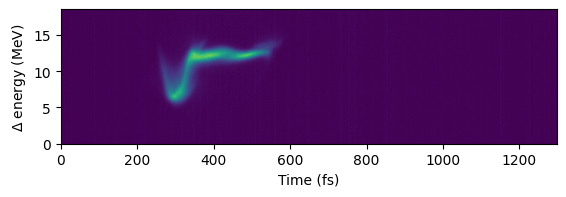

In [6]:
images = list(df['Images'])
vprd.image_processing.verify_image_sizes(images, *images[0].shape)
vprd.image_processing.show_phase_image(images[0])
len(images)


## Extract electron power

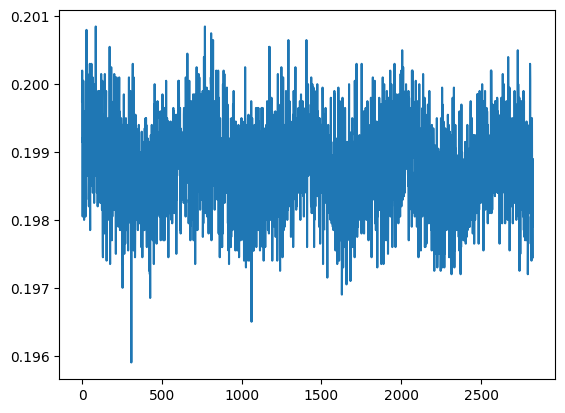

In [7]:
charge_key = '/FLASH_DIAG/TOROID/7FL2XTDS/CHARGE_TD'
if charge_key in df.keys():
    df[charge_key].plot()
    df[charge_key].mean()

Measured charges: 0.198787844959338


AGX: exceeded compiled variants footprint limit


(2826, 567)

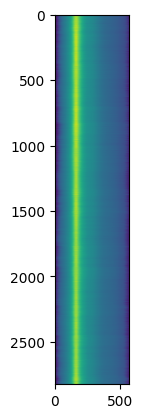

In [8]:
if charge_key not in df.keys():
    measured_charges = [0.198787844959338] * len(images)
else:
    measured_charges = list(df[charge_key])
print(f'Measured charges: {np.mean(measured_charges)}')
energy = vprd.image_processing.extract_electron_power(images, measured_charges)
plt.imshow(energy)
energy.shape

In [9]:
np.max(energy), np.min(energy)

(np.float32(23596640000.0), np.float32(768066750.0))

In [10]:
#replace images with electron power in the dataframe
df['Images'] = [data for data in energy]

#rename the column
df.rename(columns={'Images': 'Electron_power'}, inplace=True)

df

,index,TrainId,Electron_power,/FLASH_SDIAG/BCM_DAQ/FL0_DBC1_1/COMPRESSION_TD,/FLASH_SDIAG/BCM_DAQ/FL0_DBC1_1/COMPRESSION_normalized_TD,/FLASH_SDIAG/BCM_DAQ/FL0_DBC1_2/COMPRESSION_TD,/FLASH_SDIAG/BCM_DAQ/FL0_DBC1_2/COMPRESSION_normalized_TD,/FLASH_SDIAG/BCM_DAQ/FL0_DBC2_1/COMPRESSION_TD,/FLASH_SDIAG/BCM_DAQ/FL0_DBC2_1/COMPRESSION_normalized_TD,/FLASH_SDIAG/BCM_DAQ/FL0_DBC2_2/COMPRESSION_TD,...,/FLASH_SDIAG/BAM_DAQ/FL0_DBC2_ARRIVAL_TIME_RELATIVE/Value,/FLASH_SDIAG/BAM_DAQ/FL0_UBC1_ARRIVAL_TIME_RELATIVE/Value,/FLASH_SDIAG/BAM_DAQ/FL0_UBC2_ARRIVAL_TIME_RELATIVE/Value,/FLASH_SDIAG/BAM_DAQ/FL2_SEED5_ARRIVAL_TIME_RELATIVE/Value,/FLASH_DIAG/TOROID/7FL2XTDS/CHARGE_TD,/FLASH_DIAG/BPM/9FL2XTDS/CHARGE_TD,/FLASH_DIAG/BPM/9FL2XTDS/X_TD,/FLASH_DIAG/BPM/9FL2XTDS/Y_TD,/FLASH_SDIAG/BAM_DAQ/FL0_DBC_ARRIVAL_TIME_1_DELTA/Value,/FLASH_SDIAG/BAM_DAQ/FL0_DBC_ARRIVAL_TIME_2_DELTA/Value
0,0,1942830449,"[1662811600.0, 1349448800.0, 1751699800.0, 181...",0.013977,0.348380,0.091400,2.278164,0.074997,1.845281,0.121796,...,-220.290619,104.842995,61.064560,0.000000,0.19975,0.312712,3.350192,0.666741,-158.124146,-281.355164
1,1,1942830450,"[1967650400.0, 2245198300.0, 2240654300.0, 259...",0.013916,0.346859,0.091583,2.282728,0.070892,1.739970,0.117287,...,-261.015320,155.832520,64.939682,0.000000,0.20020,0.313796,3.352160,0.641766,-212.231873,-325.955017
2,2,1942830451,"[1386138800.0, 1067803460.0, 1238563600.0, 124...",0.014160,0.356138,0.090637,2.279587,0.069534,1.720248,0.113998,...,-264.227295,118.235802,38.283401,0.000000,0.19915,0.311799,3.350848,0.631928,-182.867188,-302.510681
3,3,1942830452,"[1033531300.0, 1054784450.0, 1347648800.0, 166...",0.014252,0.356649,0.091309,2.284999,0.070473,1.739136,0.116226,...,-279.466400,121.219620,47.366535,0.000000,0.19920,0.312148,3.348224,0.605440,-180.267105,-326.832947
4,4,1942830453,"[1613813100.0, 1686847600.0, 1710520800.0, 148...",0.013397,0.338816,0.090607,2.291443,0.070549,1.769915,0.117233,...,-257.225800,125.389000,54.010460,0.000000,0.19805,0.309478,3.344944,0.613008,-149.830109,-311.236267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,701,1942833280,"[1545094400.0, 1464527400.0, 1686040400.0, 211...",0.013794,0.346406,0.091064,2.286891,0.069237,1.726600,0.116127,...,3199.421387,95.763153,50.104500,915.777893,0.19845,0.307937,3.297712,1.471219,-24.689453,3149.316895
2822,702,1942833281,"[1687414700.0, 1671712500.0, 1802142300.0, 171...",0.013336,0.336933,0.090881,2.296079,0.070290,1.757240,0.117294,...,3176.591797,70.574585,34.945549,913.403259,0.19795,0.307196,3.302304,1.437920,-18.579449,3141.646240
2823,703,1942833282,"[2133312600.0, 2140152700.0, 2141127400.0, 251...",0.012634,0.320326,0.090424,2.292573,0.074982,1.880179,0.119492,...,3217.532715,22.281994,84.973656,908.230225,0.19790,0.306707,3.303616,1.434893,85.547791,3132.559082
2824,704,1942833283,"[2425803300.0, 2622600400.0, 2758704600.0, 282...",0.012787,0.320312,0.091187,2.284229,0.071724,1.766502,0.118690,...,3214.079834,112.387871,112.746269,911.354187,0.19890,0.308870,3.304928,1.428082,13.353401,3101.333496


In [11]:
# save the dataframe
df.to_hdf(local_data_path / output_file_name, key='df', mode='w')


/var/folders/8s/7jr95f1d28vflnwm1cfqv7t40000gr/T/ipykernel_27507/2991854836.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['Electron_power'], dtype='object')]

  df.to_hdf(local_data_path / output_file_name, key='df', mode='w')
